In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [16]:
img_path = '/home/chohj/work/pre/숙제이미지/0d4c7365-994c-464c-99e3-f516ed84fd1f.jpg'
fig = cv2.imread(img_path)
r_img = cv2.cvtColor(fig, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(fig, cv2.COLOR_BGR2GRAY)

fig = gray

width = height = 256
kernel = np.ones((5, 5), np.float32) / 25.0
smoothed = cv2.filter2D(fig, -1, kernel)
# resize to 128x128
resized = cv2.resize(smoothed, (width, height), interpolation=cv2.INTER_CUBIC)
# Get Log Amplitude
ffted = np.fft.fft2(resized);
mag = np.log1p(np.abs(np.fft.fftshift(ffted)))
# Get Phase
Phase = np.angle(ffted);
# get Residual of Spectral
SR = mag - cv2.filter2D(mag, -1, kernel);
SRSM = np.abs(np.fft.ifft2(mag*np.exp(1j*Phase)));
SM= cv2.GaussianBlur(SRSM, (15, 15), 3)

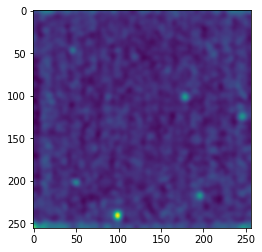

In [17]:
plt.imshow(SM)
plt.show()

In [23]:
smmin = np.min(SM)
smmax = np.max(SM)
SSM = (SM - smmin) / (smmax- smmin)

img = np.where(SSM >= 0.8, 255, 0)
img = img.astype('uint8')
img = 255 - img

params = cv2.SimpleBlobDetector_Params()

# Color
params.filterByColor = False
params.blobColor = 0

# Change thresholds
params.minThreshold = 20
params.maxThreshold = 200

# Filter by Area.
params.filterByArea = True
params.minArea = 0.01
params.maxArea = 500

# Filter by Circularity
params.filterByCircularity = False
params.minCircularity = 0.1

# Filter by Convexity
params.filterByConvexity = False
params.minConvexity = 0.87

# Filter by Inertia
params.filterByInertia = False
params.minInertiaRatio = 0.01

# Create a detector with the parameters
ver = (cv2.__version__).split('.')
if int(ver[0]) < 3 :
    detector = cv2.SimpleBlobDetector(params)
else : 
    detector = cv2.SimpleBlobDetector_create(params)


# Detect blobs.
keypoints = detector.detect(img)
# if len(keypoints) != 1:
#     ngimg_list.append(pt)

# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures
# the size of the circle corresponds to the size of blob

im_with_keypoints = cv2.drawKeypoints(img, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

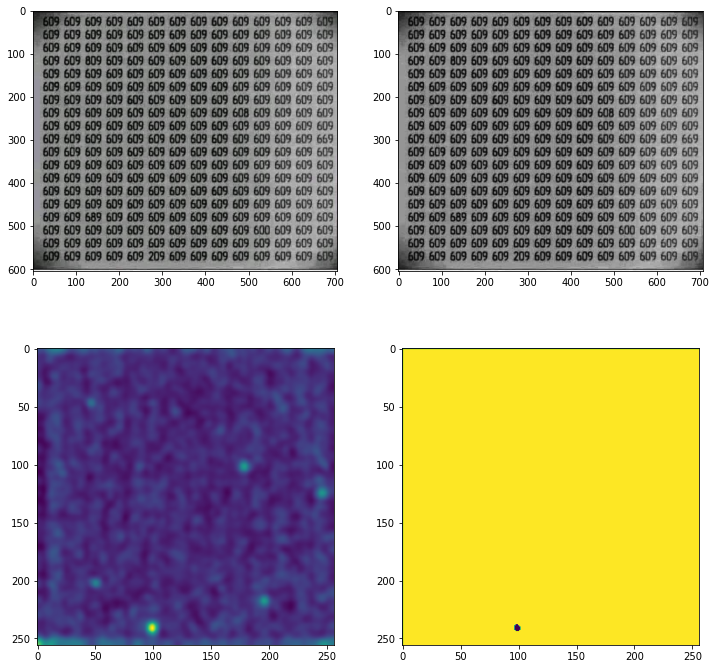

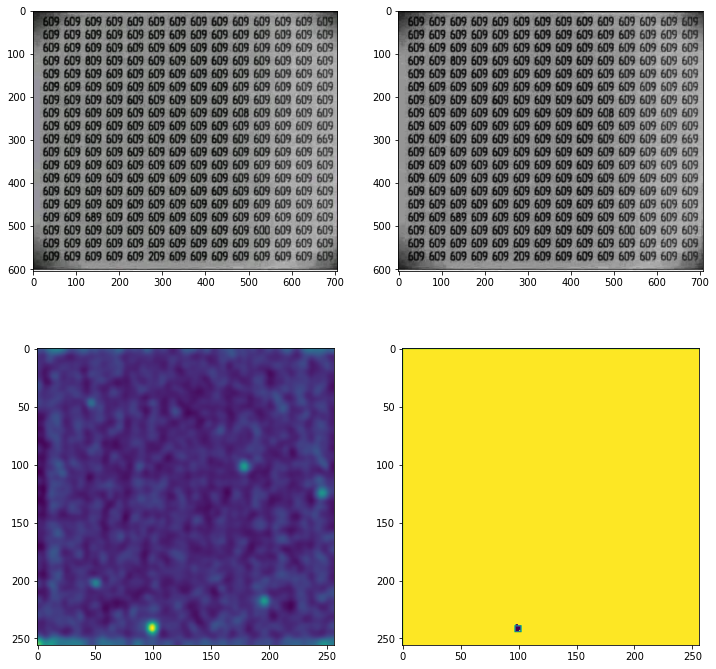

In [24]:
contours, hierachy = cv2.findContours(cv2.cvtColor(im_with_keypoints, cv2.COLOR_BGR2GRAY).astype(np.uint8), cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)


# 첫번째 contours의 moment 특징 추출
# cnt = contours[0]
# M = cv2.moments(cnt)

img1 = img.copy().astype("uint8")


for z in contours:
# M = cv2.moments(z)
    x, y, w, h = cv2.boundingRect(z)
    img1 = cv2.rectangle(img1, (x, y), (x+w, y+h), 100)


    # # Show keypoints
    plt.figure(figsize=(12,12))

    plt.subplot(221)
    plt.imshow(r_img)

    plt.subplot(222)
    plt.imshow(fig, cmap='gray')

    plt.subplot(223)
    plt.imshow(SM)

    plt.subplot(224)
    plt.imshow(img1)
    plt.show()